In [ ]:
pip install lambeq

In [2]:
train_data=['the trump clinton to of hillary in is and donald',
            'charlotte police the in black of to for and after',
            'obama to the be trump for on it and in']

In [3]:
train_labels=[[0,1],[0,1],[1,0]]

In [5]:
from lambeq import BobcatParser

parser = BobcatParser(root_cats=('NP', 'N'), verbose='text')


In [6]:
raw_train_diagrams = parser.sentences2diagrams(train_data, suppress_exceptions=True)

Tagging sentences.
Parsing tagged sentences.
Turning parse trees to diagrams.


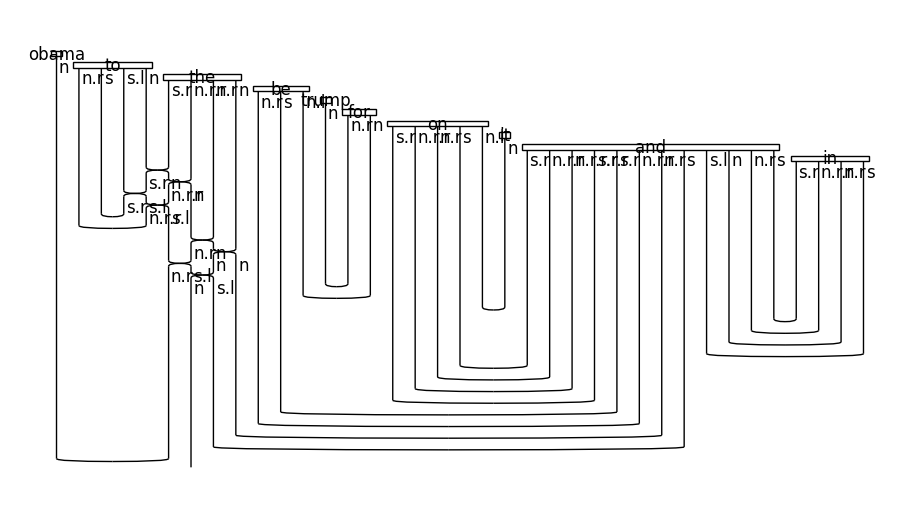

In [11]:
raw_train_diagrams[2].draw(figsize=(9, 5), fontsize=12)

In [7]:
train_diagrams = [
    diagram.normal_form()
    for diagram in raw_train_diagrams if diagram is not None
]

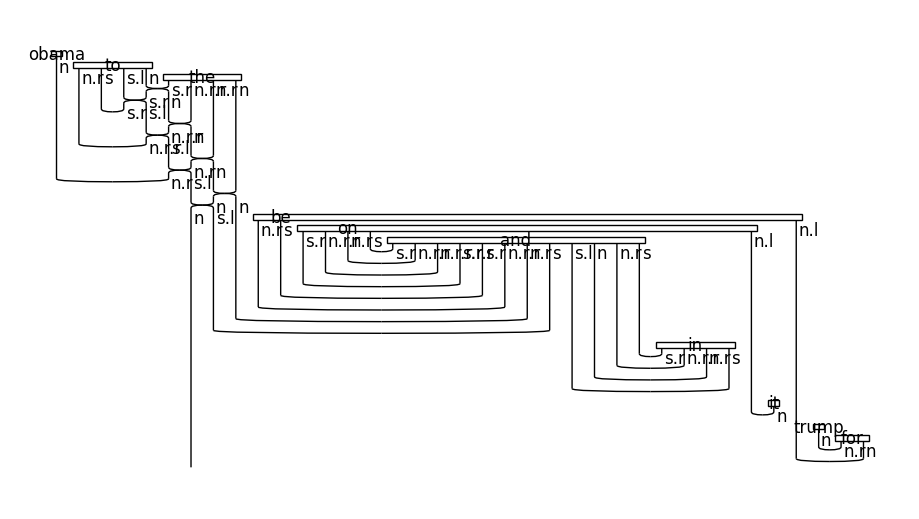

In [13]:
train_diagrams[2].draw(figsize=(9, 5), fontsize=12)

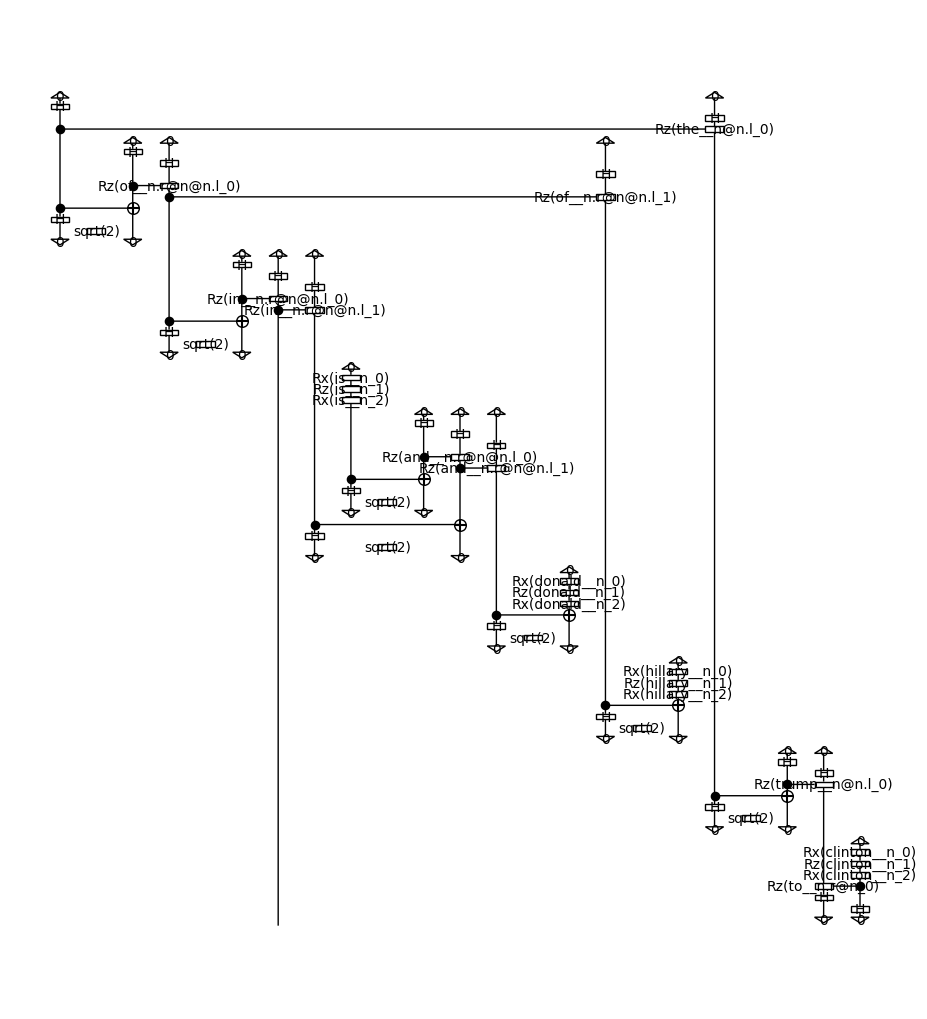

In [8]:
from lambeq import AtomicType, IQPAnsatz, remove_cups

ansatz = IQPAnsatz({AtomicType.NOUN: 1, AtomicType.SENTENCE: 0},
                   n_layers=1, n_single_qubit_params=3)

train_circuits = [ansatz(remove_cups(diagram)) for diagram in train_diagrams]


train_circuits[0].draw(figsize=(9, 10))

In [ ]:
!pip install pytket-qiskit

In [9]:
from pytket.extensions.qiskit import AerBackend
from lambeq import TketModel

all_circuits = train_circuits 

backend = AerBackend()
backend_config = {
    'backend': backend,
    'compilation': backend.default_compilation_pass(2),
    'shots': 8192
}

model = TketModel.from_diagrams(all_circuits, backend_config=backend_config)

In [11]:
from lambeq import BinaryCrossEntropyLoss

# Using the builtin binary cross-entropy error from lambeq
bce = BinaryCrossEntropyLoss()

acc = lambda y_hat, y: np.sum(np.round(y_hat) == y) / len(y) / 2  # half due to double-counting
eval_metrics = {"acc": acc}

In [12]:
from lambeq import QuantumTrainer, SPSAOptimizer

trainer = QuantumTrainer(
    model,
    loss_function=bce,
    epochs=10,
    optimizer=SPSAOptimizer,
    optim_hyperparams={'a': 0.05, 'c': 0.06, 'A':0.01*10},
    evaluate_functions=eval_metrics,
    evaluate_on_train=True,
    verbose = 'text',
    seed=0
)

In [13]:
from lambeq import Dataset

train_dataset = Dataset(
            train_circuits,
            train_labels,
            batch_size=1)

In [14]:
len(train_labels),len(train_circuits),len(train_diagrams),len(raw_train_diagrams)

(3, 3, 3, 3)

In [15]:
import numpy as np
trainer.fit(train_dataset, evaluation_step=1, logging_step=1)

Epoch 1:   train/loss: 0.6931   valid/loss: -----   train/acc: 0.5000   valid/acc: -----
Epoch 2:   train/loss: 0.6931   valid/loss: -----   train/acc: 0.5000   valid/acc: -----
Epoch 3:   train/loss: 0.6931   valid/loss: -----   train/acc: 0.5000   valid/acc: -----
Epoch 4:   train/loss: 0.6931   valid/loss: -----   train/acc: 0.5000   valid/acc: -----
Epoch 5:   train/loss: 0.6931   valid/loss: -----   train/acc: 0.5000   valid/acc: -----
Epoch 6:   train/loss: 0.6931   valid/loss: -----   train/acc: 0.5000   valid/acc: -----
Epoch 7:   train/loss: 0.6931   valid/loss: -----   train/acc: 0.5000   valid/acc: -----
Epoch 8:   train/loss: 0.6931   valid/loss: -----   train/acc: 0.5000   valid/acc: -----
Epoch 9:   train/loss: 0.6931   valid/loss: -----   train/acc: 0.5000   valid/acc: -----
Epoch 10:  train/loss: 0.6931   valid/loss: -----   train/acc: 0.5000   valid/acc: -----

Training completed!


In [16]:
model(train_circuits)

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [ ]:
!pip install keybert

In [ ]:
from keybert import KeyBERT
kw_model = KeyBERT()
#keywords = kw_model.extract_keywords(data[0])
#print(keywords)

In [10]:
import pandas as pd
data=pd.read_csv('/content/topics_on_abstracted.csv')

In [11]:
data=data['abstractive_summarization_data']

In [12]:
from keybert import KeyBERT
kw_model = KeyBERT()
list_of_keywords=[]
for i in data:
  keywords = kw_model.extract_keywords(i)
  list_of_keywords.append(keywords)

In [ ]:
list_of_keywords

In [13]:
len(list_of_keywords)

422

In [14]:
import pandas as pd
data_updated_with_keywords=pd.read_csv('/content/topics_on_abstracted.csv')

In [15]:
data_updated_with_keywords['list_of_keywords']=list_of_keywords

In [16]:
data_updated_with_keywords.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,title,text,authors,target,Fake_Genuine,abstractive_summarization_data,topics,list_of_keywords
0,0,0,0,Proof The Mainstream Media Is Manipulating The...,I woke up this morning to find a variation of ...,Wendy Gittleson,fake,Proof The Mainstream Media Is Manipulating The...,Proof The Mainstream Media Is Manipulating The...,2,"[(clinton, 0.4002), (media, 0.3369), (manipula..."
1,1,1,1,Charity: Clinton Foundation Distributed “Water...,Former President Bill Clinton and his Clinton ...,View All Posts,fake,Charity: Clinton Foundation Distributed “Water...,Charity: Clinton Foundation Distributed “Water...,2,"[(hiv, 0.4688), (aids, 0.4494), (clinton, 0.39..."
2,2,2,2,A Hillary Clinton Administration May be Entire...,After collapsing just before trying to step in...,"View All Posts,Tony Elliott",fake,A Hillary Clinton Administration May be Entire...,A Hillary Clinton Administration May be Entire...,2,"[(clinton, 0.4893), (hillary, 0.4688), (emerge..."
3,3,3,3,Trump’s Latest Campaign Promise May Be His Mos...,"Donald Trump is, well, deplorable. He’s sugges...",John Prager,fake,Trump’s Latest Campaign Promise May Be His Mos...,Trump’s Latest Campaign Promise May Be His Mos...,2,"[(yetdonald, 0.515), (deplorable, 0.3858), (tr..."
4,4,4,4,Website is Down For Maintenance,Website is Down For Maintenance,Unknown Authors,fake,Website is Down For MaintenanceWebsite is Down...,Website is Down For MaintenanceWebsite is Down...,0,"[(maintenancewebsite, 0.7419), (maintenanceunk..."


In [32]:
sentences_from_keywords=[]
for i in range(len(data_updated_with_keywords)):
  temp_string=""
  for words in (data_updated_with_keywords['list_of_keywords'].iloc[i]):
    temp_string=temp_string+" "+(words[0])
    temp_string=temp_string.strip()
  sentences_from_keywords.append(temp_string)

In [33]:
len(sentences_from_keywords)

422

In [34]:
sentences_from_keywords[0],sentences_from_keywords[1]

('clinton media manipulating campaign news',
 'hiv aids clinton charity foundation')

In [35]:
data_updated_with_keywords['sentences_from_keywords']=sentences_from_keywords

In [36]:
data_updated_with_keywords.to_csv('sentences_from_keywords.csv')

In [37]:
## Splitting the dataset into train  and test

In [38]:
## Deleting rows with empty sentences 

In [43]:
for i in range(len(data_updated_with_keywords['sentences_from_keywords'])):
  if len(data_updated_with_keywords['sentences_from_keywords'].iloc[i])==0:
    print(i)

51


In [46]:
## deleting the 51 index from dataset:
data_updated_with_keywords=data_updated_with_keywords.drop(data_updated_with_keywords.index[51])

In [48]:
data_updated_with_keywords.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,title,text,authors,target,Fake_Genuine,abstractive_summarization_data,topics,list_of_keywords,sentences_from_keywords
0,0,0,0,Proof The Mainstream Media Is Manipulating The...,I woke up this morning to find a variation of ...,Wendy Gittleson,fake,Proof The Mainstream Media Is Manipulating The...,Proof The Mainstream Media Is Manipulating The...,2,"[(clinton, 0.4002), (media, 0.3369), (manipula...",clinton media manipulating campaign news
1,1,1,1,Charity: Clinton Foundation Distributed “Water...,Former President Bill Clinton and his Clinton ...,View All Posts,fake,Charity: Clinton Foundation Distributed “Water...,Charity: Clinton Foundation Distributed “Water...,2,"[(hiv, 0.4688), (aids, 0.4494), (clinton, 0.39...",hiv aids clinton charity foundation
2,2,2,2,A Hillary Clinton Administration May be Entire...,After collapsing just before trying to step in...,"View All Posts,Tony Elliott",fake,A Hillary Clinton Administration May be Entire...,A Hillary Clinton Administration May be Entire...,2,"[(clinton, 0.4893), (hillary, 0.4688), (emerge...",clinton hillary emerged collapsing daughter
3,3,3,3,Trump’s Latest Campaign Promise May Be His Mos...,"Donald Trump is, well, deplorable. He’s sugges...",John Prager,fake,Trump’s Latest Campaign Promise May Be His Mos...,Trump’s Latest Campaign Promise May Be His Mos...,2,"[(yetdonald, 0.515), (deplorable, 0.3858), (tr...",yetdonald deplorable trump horrible promise
4,4,4,4,Website is Down For Maintenance,Website is Down For Maintenance,Unknown Authors,fake,Website is Down For MaintenanceWebsite is Down...,Website is Down For MaintenanceWebsite is Down...,0,"[(maintenancewebsite, 0.7419), (maintenanceunk...",maintenancewebsite maintenanceunknown website ...


In [50]:
##Splitting
from sklearn.model_selection import train_test_split
y=data_updated_with_keywords['target']
del data_updated_with_keywords['target']
X=data_updated_with_keywords
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=18)

In [51]:
len(X_train),len(X_test),len(y_test)

(336, 85, 85)

In [52]:
X_train.to_csv('X_train.csv')
X_test.to_csv('X_test.csv')
y_train.to_csv('y_train.csv')
y_test.to_csv('y_test.csv')

In [53]:
## Implememting Quantum Pipeline

In [ ]:
!pip install lambeq

In [3]:
import pandas as pd
X_train=pd.read_csv('/content/X_train.csv')
X_test=pd.read_csv('/content/X_test.csv')
y_train=pd.read_csv('/content/y_train.csv')
y_test=pd.read_csv('/content/X_test.csv')

In [4]:
from lambeq import BobcatParser

parser = BobcatParser(root_cats=('NP', 'N'), verbose='text')


Evaluating checksum: 0.0%|          |0.000/1.533GB [00:00<?]

Extracting model...


In [5]:
del y_train['Unnamed: 0']
del y_test['Unnamed: 0']

In [6]:
## Creating train_labels and test_labels
train_labels=[]
for i in y_train['target']:
  temp_list=[]
  if(i)=='real':
    temp_list.append(1)
    temp_list.append(0)
  else:
    temp_list.append(0)
    temp_list.append(1)
  train_labels.append(temp_list)
test_labels=[]
for i in y_train['target']:
  temp_list=[]
  if(i)=='real':
    temp_list.append(1)
    temp_list.append(0)
  else:
    temp_list.append(0)
    temp_list.append(1)
  test_labels.append(temp_list)

In [7]:
len(train_labels),train_labels[:10],len(test_labels),test_labels[:10]

(336,
 [[0, 1],
  [1, 0],
  [0, 1],
  [0, 1],
  [1, 0],
  [1, 0],
  [1, 0],
  [1, 0],
  [1, 0],
  [0, 1]],
 336,
 [[0, 1],
  [1, 0],
  [0, 1],
  [0, 1],
  [1, 0],
  [1, 0],
  [1, 0],
  [1, 0],
  [1, 0],
  [0, 1]])

In [7]:
## Converting the train and test dataset to list
#X_train=X_train.tolist()
val_data=X_test['sentences_from_keywords'].tolist()

In [8]:
X_train=X_train['sentences_from_keywords'].tolist()
val_data[:3],X_train[:3]

(['contempt contemptstory committee clinton pagliano',
  'children easter hillary tards egg',
  'veto override congress senate obama'],
 ['obama heraldobama isis surrendering disgraced',
  'netanyahu barack obama meeting israeli',
  'ceo hostages employers presidencyfor democrat'])

In [ ]:
raw_train_diagrams = parser.sentences2diagrams(X_train, suppress_exceptions=True)

Tagging sentences.


In [ ]:
train_diagrams = [
    diagram.normal_form()
    for diagram in raw_train_diagrams if diagram is not None
]

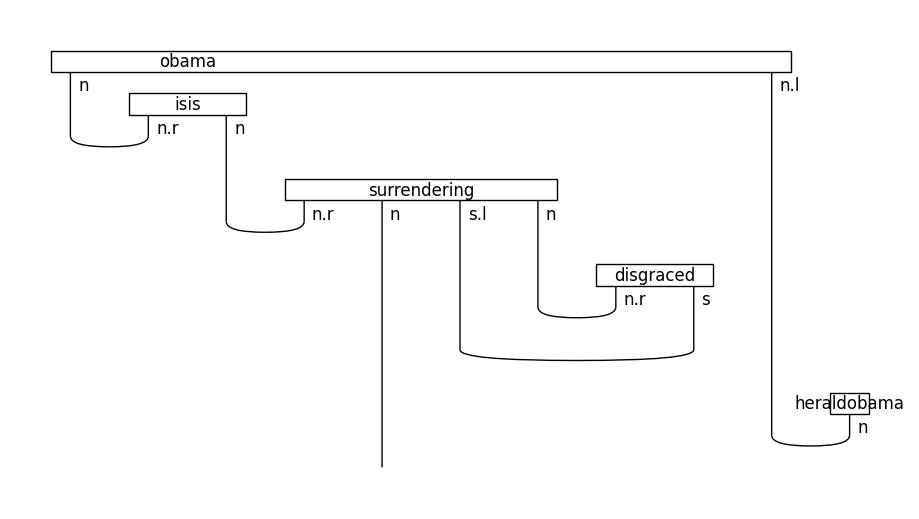

In [40]:
train_diagrams[0].draw(figsize=(9, 5), fontsize=12)

In [56]:
type(train_diagrams),type(raw_train_diagrams)

(321, 328)

In [ ]:
from lambeq import AtomicType, IQPAnsatz, remove_cups

ansatz = IQPAnsatz({AtomicType.NOUN: 1, AtomicType.SENTENCE: 0},
                   n_layers=1, n_single_qubit_params=3)

train_circuits = [ansatz(remove_cups(diagram)) for diagram in train_diagrams if diagram is not None]

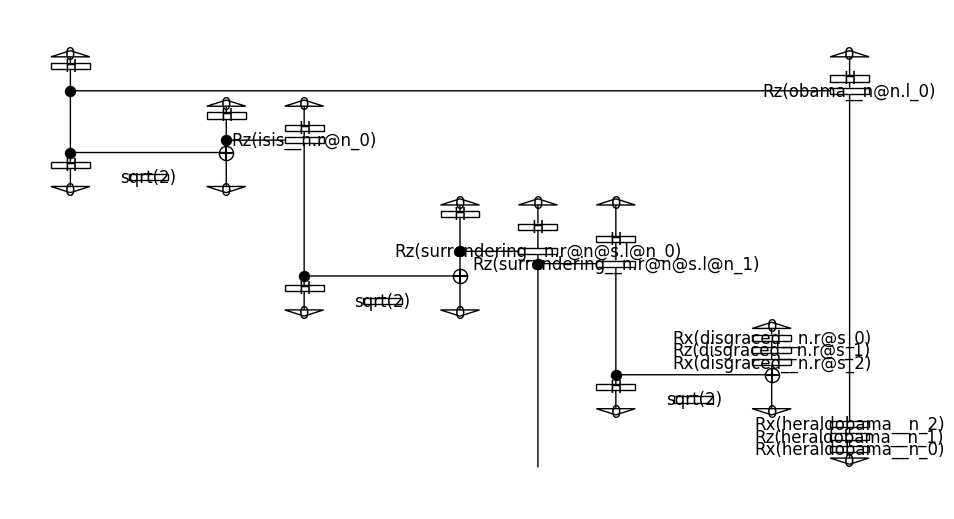

In [42]:
train_circuits[0].draw(figsize=(9, 5), fontsize=12)

In [ ]:
raw_val_diagrams = parser.sentences2diagrams(val_data, suppress_exceptions=True)

In [ ]:
val_diagrams = [
    diagram.normal_form()
    for diagram in raw_val_diagrams if diagram is not None
]

In [ ]:
train_labels = [
    label for (diagram, label)
    in zip(raw_train_diagrams, train_labels)
    if diagram is not None]

In [16]:
len(train_labels),len(train_circuits)

(328, 328)

In [ ]:
val_circuits =  [ansatz(remove_cups(diagram))  for diagram in val_diagrams if diagram is not None]

In [ ]:
val_labels = [
    label for (diagram, label)
    in zip(raw_val_diagrams, test_labels)
    if diagram is not None
]


In [ ]:
len(val_labels),len(val_circuits)

In [ ]:
!!pip install pytket-qiskit

In [22]:
from pytket.extensions.qiskit import AerBackend
from lambeq import TketModel

all_circuits = train_circuits + val_circuits

backend = AerBackend()
backend_config = {
    'backend': backend,
    'compilation': backend.default_compilation_pass(2),
    'shots': 8192
}

model = TketModel.from_diagrams(all_circuits, backend_config=backend_config)

In [24]:
from lambeq import BinaryCrossEntropyLoss

# Using the builtin binary cross-entropy error from lambeq
bce = BinaryCrossEntropyLoss()

acc = lambda y_hat, y: np.sum(np.round(y_hat) == y) / len(y) / 2  # half due to double-counting
eval_metrics = {"acc": acc}

In [45]:
from lambeq import QuantumTrainer, SPSAOptimizer

trainer = QuantumTrainer(
    model,
    loss_function=bce,
    epochs=10,
    optimizer=SPSAOptimizer,
    optim_hyperparams={'a': 0.05, 'c': 0.06, 'A':0.01*10},
    evaluate_functions=eval_metrics,
    evaluate_on_train=True,
    verbose = 'text',
    seed=0
)

In [26]:
from lambeq import Dataset

train_dataset = Dataset(
            train_circuits,
            train_labels,
            batch_size=2)

val_dataset = Dataset(val_circuits, val_labels, shuffle=False)

In [1]:
import numpy as np
trainer.fit(train_dataset, val_dataset, evaluation_step=1, logging_step=1)

NameError: ignored

Validation accuracy: 0.43506493506493504


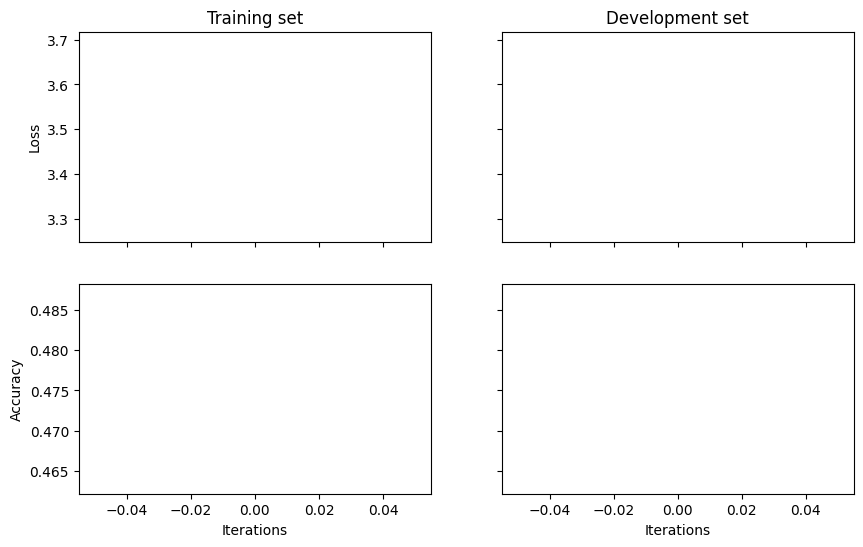

In [29]:
import matplotlib.pyplot as plt

fig, ((ax_tl, ax_tr), (ax_bl, ax_br)) = plt.subplots(2, 2, sharex=True, sharey='row', figsize=(10, 6))
ax_tl.set_title('Training set')
ax_tr.set_title('Development set')
ax_bl.set_xlabel('Iterations')
ax_br.set_xlabel('Iterations')
ax_bl.set_ylabel('Accuracy')
ax_tl.set_ylabel('Loss')

colours = iter(plt.rcParams['axes.prop_cycle'].by_key()['color'])
ax_tl.plot(trainer.train_epoch_costs[::10], color=next(colours))
ax_bl.plot(trainer.train_results['acc'][::10], color=next(colours))
ax_tr.plot(trainer.val_costs[::10], color=next(colours))
ax_br.plot(trainer.val_results['acc'][::10], color=next(colours))

# print test accuracy
test_acc = acc(model(val_circuits), val_labels)
print('Validation accuracy:', test_acc.item())

In [31]:
predictions=model(val_circuits)

In [37]:
predictions_true=[]
predictions_fake=[]
for i in predictions:
  predictions_true.append(i[0])
  predictions_fake.append(i[1])

In [41]:
quantum_predictions=pd.DataFrame()
quantum_predictions['true']=predictions_true
quantum_predictions['fake']=predictions_fake
quantum_predictions['test_labels']=val_labels

In [44]:
quantum_predictions.to_csv('quantum_predictions.csv')

In [42]:
quantum_predictions

,true,fake,test_labels
0,0.000000,1.000000,"[0, 1]"
1,0.500000,0.500000,"[1, 0]"
2,0.750000,0.250000,"[0, 1]"
3,0.714286,0.285714,"[0, 1]"
4,0.551724,0.448276,"[1, 0]"
...,...,...,...
72,1.000000,0.000000,"[1, 0]"
73,0.615385,0.384615,"[0, 1]"
74,1.000000,0.000000,"[1, 0]"
75,0.000000,0.000000,"[1, 0]"
